# Casement Aerordrome Weather 1945 - Present (PDA Project 2019)

## Investigation of the dataset
I will simulate a dataset, sourced from Met Eireann [1]. This dataset will be investigated and then simulated.

In [1]:
import numpy as np
# Import pandas and load the dataset
import pandas as pd
df = pd.read_csv('mly3723.csv',skiprows=18) # read in the csv and skip the non-data explanatory rows.

The dataset contains the following variables :

year - year of the measurement

month - month of the measurement

rain - Precipitation Amount (mm)

meant - Mean Air Temperature (C)

maxtp - Maximum Air Temperature (C)

mintp - Minimum Air Temperature (C)

mnmax - Mean Maximum Temperature (C)

mnmin - Mean Minimum Temperature (C)

gmin - Grass Minimum Temperature (C)

wdsp - Mean Wind Speed (knot)

mxgt - Highest Gust (knot)

sun - Sunshine duration (hours)


In [2]:
df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,sun
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1991.210526,6.473684,9.466617,18.221203,-0.366165,13.234586,5.701504,61.773835,-3.856842,113.964662
std,16.010658,3.457093,3.915470,4.763040,4.318500,4.452386,3.459947,33.833433,4.528277,52.220373
min,1964.000000,1.000000,-0.500000,5.400000,-15.700000,3.300000,-4.200000,1.700000,-17.100000,22.100000
25%,1977.000000,3.000000,6.100000,13.900000,-3.700000,9.400000,2.800000,37.100000,-7.400000,67.900000
50%,1991.000000,6.000000,8.700000,18.100000,-0.900000,12.800000,5.200000,56.800000,-4.200000,110.900000
75%,2005.000000,9.000000,13.100000,22.400000,3.300000,17.200000,8.800000,79.500000,-0.200000,151.100000
max,2019.000000,12.000000,17.800000,31.000000,9.500000,23.500000,12.900000,206.300000,8.200000,256.500000


In [3]:
df.head(10)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1964,1,5.5,10.9,-3.3,8.2,2.9,18.1,-7.8,,,38.9
1,1964,2,5.0,13.3,-6.7,7.9,2.2,22.4,-11.1,,,87.7
2,1964,3,5.1,13.0,-3.2,8.6,1.6,64.1,-7.4,,,74.9
3,1964,4,8.2,16.2,-2.4,12.2,4.2,49.5,-7.3,,,148.0
4,1964,5,11.7,21.3,2.9,16.2,7.2,42.8,0.4,,,195.3
5,1964,6,12.8,22.9,2.9,16.8,8.8,46.7,-1.0,,,136.6
6,1964,7,14.9,23.3,3.6,19.1,10.7,31.5,-1.7,,,150.6
7,1964,8,14.1,23.1,1.5,18.5,9.6,78.7,-2.6,,,176.1
8,1964,9,13.2,21.6,1.9,17.6,8.9,44.5,-1.4,,,159.7
9,1964,10,8.7,17.3,-0.9,12.5,4.9,72.4,-3.4,,,89.3


The dataset begins in 1964.

In [4]:
df.tail(10)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
655,2018,8,15.6,25.4,6.0,20.1,11.1,43.3,0.8,9.3,33,135.9
656,2018,9,12.3,24.0,0.7,16.8,7.9,37.0,-3.1,10.0,56,136.8
657,2018,10,9.2,19.7,-4.3,13.4,5.1,56.0,-9.2,9.4,51,127.0
658,2018,11,8.3,15.0,-0.8,10.8,5.8,104.6,-5.0,10.7,62,62.3
659,2018,12,7.9,13.0,0.0,10.1,5.8,88.9,-3.0,11.3,52,22.1
660,2019,1,5.2,10.9,-3.0,7.6,2.7,33.1,-9.2,9.4,42,40.3
661,2019,2,7.2,17.2,-4.1,11.3,3.2,22.2,-7.8,12.0,54,117.0
662,2019,3,7.1,16.9,-2.8,11.3,2.9,86.2,-5.7,12.5,49,130.3
663,2019,4,8.4,21.6,-1.7,12.4,4.4,69.1,-4.5,8.3,48,120.3
664,2019,5,10.9,21.1,-1.3,15.5,6.3,26.8,-4.0,7.1,33,161.3


and ends in 2019.

In [25]:
# Check for missing data
df.isna().sum()

year        0
month       0
meant       0
maxtp       0
mintp       0
mnmax       0
mnmin       0
rain        0
gmin        0
wdsp        0
maxgt       0
sun         0
day         0
datetime    0
dtype: int64

In [6]:
# Check for missing data
df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [7]:
# Adding in day (assuming the first of month), so I can add python datetime
df['day'] = '01' 
df['datetime'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('datetime')
df['datetime'] = pd.to_datetime(df[['year','month','day']])

### 10 year plots of the original dataset

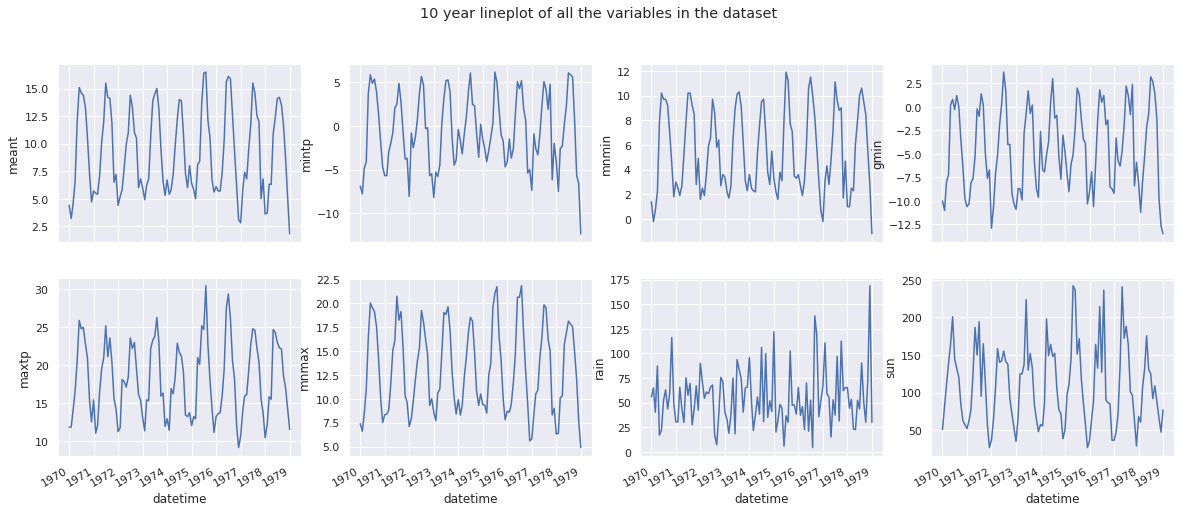

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
# The next two lines were suggested by python to get rid of a future warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style="darkgrid")
ts = df['1970-01-01':'1979-01-01'] # 109 months
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(2,4,figsize=(20,8))
sns.lineplot(x='datetime',y="meant",data=ts,ax=axes[0,0])
sns.lineplot(x='datetime',y="maxtp",data=ts,ax=axes[1,0])
sns.lineplot(x='datetime',y="mintp",data=ts,ax=axes[0,1])
sns.lineplot(x='datetime',y="mnmax",data=ts,ax=axes[1,1])
sns.lineplot(x='datetime',y="mnmin",data=ts,ax=axes[0,2])
sns.lineplot(x='datetime',y="rain",data=ts,ax=axes[1,2])
sns.lineplot(x='datetime',y="gmin",data=ts,ax=axes[0,3])
sns.lineplot(x='datetime',y="sun",data=ts,ax=axes[1,3])
axes[0,0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.suptitle('10 year lineplot of all the variables in the dataset')
fig.autofmt_xdate();


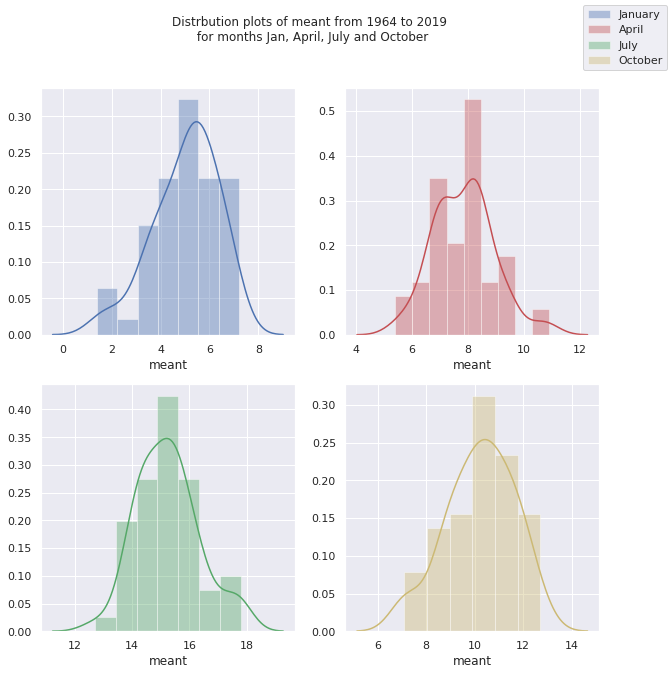

In [9]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['meant']
p2 = df.loc[df.loc[:,'month'] == 4]['meant']
p3 = df.loc[df.loc[:,'month'] == 7]['meant']
p4 = df.loc[df.loc[:,'month'] == 10]['meant']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of meant from 1964 to 2019 \n for months Jan, April, July and October');

The distribution looks reasonably normal. We will try simulate with the numpy.random.normal function.

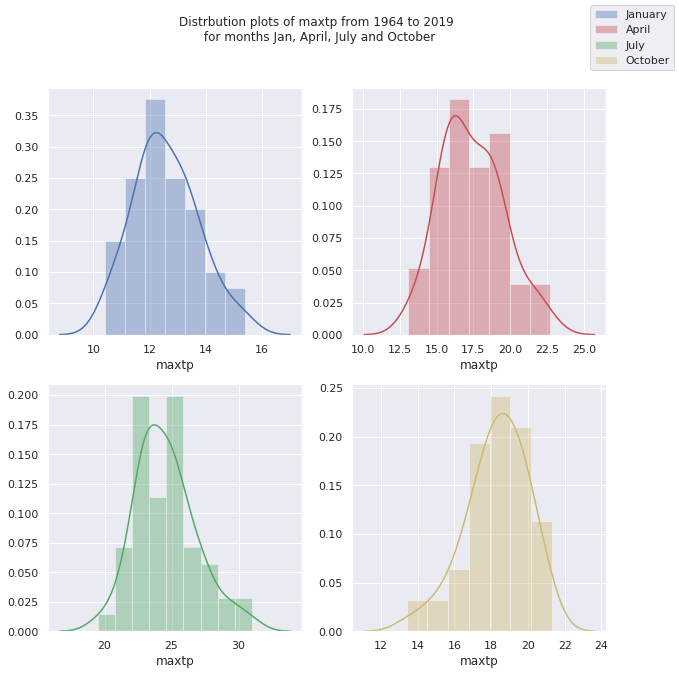

In [10]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['maxtp']
p2 = df.loc[df.loc[:,'month'] == 4]['maxtp']
p3 = df.loc[df.loc[:,'month'] == 7]['maxtp']
p4 = df.loc[df.loc[:,'month'] == 10]['maxtp']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of maxtp from 1964 to 2019 \n for months Jan, April, July and October');

The distribution looks reasonably normal. We will try simulate with the numpy.random.normal function.

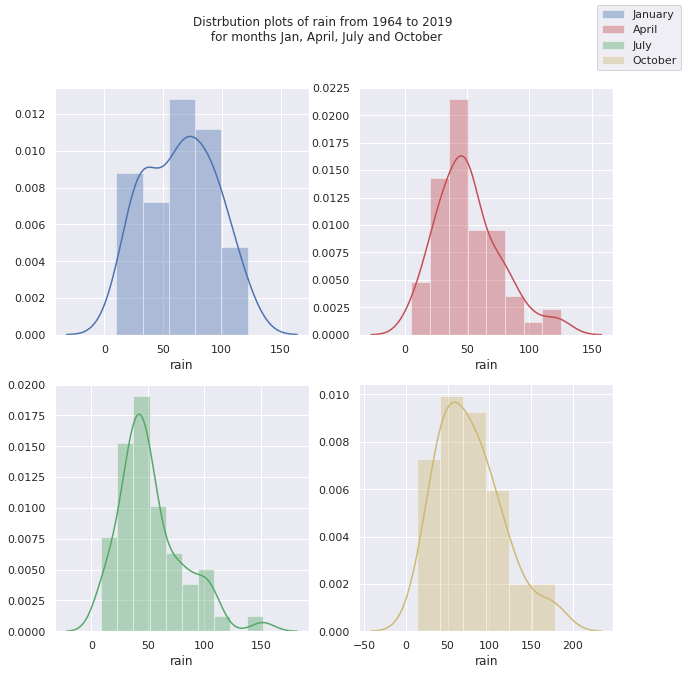

In [11]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['rain']
p2 = df.loc[df.loc[:,'month'] == 4]['rain']
p3 = df.loc[df.loc[:,'month'] == 7]['rain']
p4 = df.loc[df.loc[:,'month'] == 10]['rain']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of rain from 1964 to 2019 \n for months Jan, April, July and October');

The distribution looks reasonably normal but with a wide standard deviation. We will try simulate with the numpy.random.normal function.

In [12]:
p4.describe()

count     55.000000
mean      76.829091
std       39.098810
min       13.900000
25%       47.150000
50%       72.400000
75%       99.850000
max      178.700000
Name: rain, dtype: float64

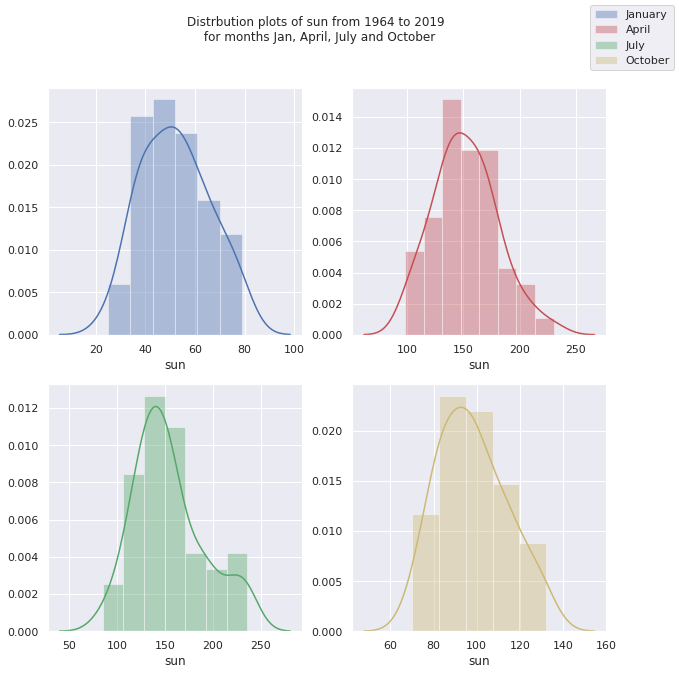

In [13]:
f, axes = plt.subplots(2,2,figsize=(10,10)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
p1 = df.loc[df.loc[:,'month'] == 1]['sun']
p2 = df.loc[df.loc[:,'month'] == 4]['sun']
p3 = df.loc[df.loc[:,'month'] == 7]['sun']
p4 = df.loc[df.loc[:,'month'] == 10]['sun']
sns.distplot(p1,color="b", ax=axes[0,0],label='January')
sns.distplot(p2,color="r", ax=axes[0,1],label='April')
sns.distplot(p3,color="g", ax=axes[1,0],label='July')
sns.distplot(p4,color="y", ax=axes[1,1],label='October')
f.legend()
plt.suptitle('Distrbution plots of sun from 1964 to 2019 \n for months Jan, April, July and October');

The distribution looks reasonably normal but with a wide standard devimation. We will try simulate with the numpy.random.normal function.

In [14]:
p1.describe()

count    56.00000
mean     52.13750
std      13.68073
min      24.80000
25%      41.65000
50%      51.25000
75%      61.07500
max      79.00000
Name: sun, dtype: float64

***
## Simulating the data

### Variable meant 

#### Finding average values for each month over the entire range of the dataset

In [15]:
# Function to get the mean of a variable for each month. This will be used later to calculate a randomised variable.
# the function accepts a dataframe column as its first argument and the standard deviation for normal distribution as its second argument (default is 1)
# A dataframe with 100 years simulated data is returned
def get_mean(df_col,sd=1):
    jan = df.loc[df.loc[:,'month'] == 1][df_col].mean()
    feb = df.loc[df.loc[:,'month'] == 2][df_col].mean()
    mar = df.loc[df.loc[:,'month'] == 3][df_col].mean()
    apr = df.loc[df.loc[:,'month'] == 4][df_col].mean()
    may = df.loc[df.loc[:,'month'] == 5][df_col].mean()
    jun = df.loc[df.loc[:,'month'] == 6][df_col].mean()
    jul = df.loc[df.loc[:,'month'] == 7][df_col].mean()
    aug = df.loc[df.loc[:,'month'] == 8][df_col].mean()
    sep = df.loc[df.loc[:,'month'] == 9][df_col].mean()
    octo = df.loc[df.loc[:,'month'] == 10][df_col].mean()
    nov = df.loc[df.loc[:,'month'] == 11][df_col].mean()
    dec = df.loc[df.loc[:,'month'] == 12][df_col].mean()
    
    # Create a 100 year date range with a 1 year frequency starting from January
    rng = pd.date_range('1/1/1900', periods=100, freq='12M')
    jan_100 = pd.DataFrame(np.random.normal(jan,sd,100), index=rng, columns=[df_col]) # Create a DF of 100 samples from normal distribution where standard deviation is 1 and mean is the january meant

    ## Create a 100 year date range with a 1 year frequency starting from February
    rng = pd.date_range('2/1/1900', periods=100, freq='12M')
    feb_100 = pd.DataFrame(np.random.normal(feb,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from March
    rng = pd.date_range('3/1/1900', periods=100, freq='12M')
    mar_100 = pd.DataFrame(np.random.normal(mar,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from April
    rng = pd.date_range('4/1/1900', periods=100, freq='12M')
    apr_100 = pd.DataFrame(np.random.normal(apr,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from May
    rng = pd.date_range('5/1/1900', periods=100, freq='12M')
    may_100 = pd.DataFrame(np.random.normal(may,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from June
    rng = pd.date_range('6/1/1900', periods=100, freq='12M')
    jun_100 = pd.DataFrame(np.random.normal(jun,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from July
    rng = pd.date_range('7/1/1900', periods=100, freq='12M')
    jul_100 = pd.DataFrame(np.random.normal(jul,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from August
    rng = pd.date_range('8/1/1900', periods=100, freq='12M')
    aug_100 = pd.DataFrame(np.random.normal(aug,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from September
    rng = pd.date_range('9/1/1900', periods=100, freq='12M')
    sept_100 = pd.DataFrame(np.random.normal(sep,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from October
    rng = pd.date_range('10/1/1900', periods=100, freq='12M')
    oct_100 = pd.DataFrame(np.random.normal(octo,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from November
    rng = pd.date_range('11/1/1900', periods=100, freq='12M')
    nov_100 = pd.DataFrame(np.random.normal(nov,sd,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from December
    rng = pd.date_range('12/1/1900', periods=100, freq='12M')
    dec_100 = pd.DataFrame(np.random.normal(dec,sd,100), index=rng, columns=[df_col])

    ## Merge all the months
    result = pd.merge(jan_100,feb_100,how='outer',on=df_col,left_index=True, right_index=True) # Adapted from https://stackoverflow.com/a/36293107
    result = pd.merge(result,mar_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,apr_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,may_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,jun_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,jul_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,aug_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,sept_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,oct_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,nov_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,dec_100,how='outer',on=df_col,left_index=True, right_index=True)
    
    return result


In [16]:
# run the function to simulate 100 year data for meant
meant_100 = get_mean('meant')
meant_100

,meant
1900-01-31,5.830551
1900-02-28,4.662114
1900-03-31,7.494919
1900-04-30,8.259821
1900-05-31,8.411669
...,...
1999-08-31,15.448384
1999-09-30,11.218221
1999-10-31,9.702602
1999-11-30,7.181890


#### Plotting the simulated meant data

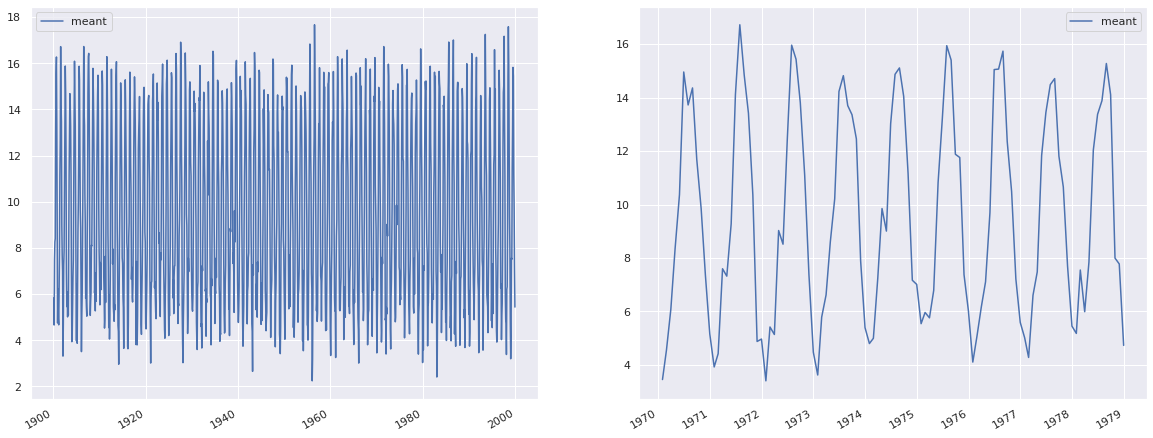

In [17]:
# Plot the results
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=meant_100,ax=axes[0])
sns.lineplot(data=meant_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

In [18]:
maxtp_100 = get_mean('maxtp')

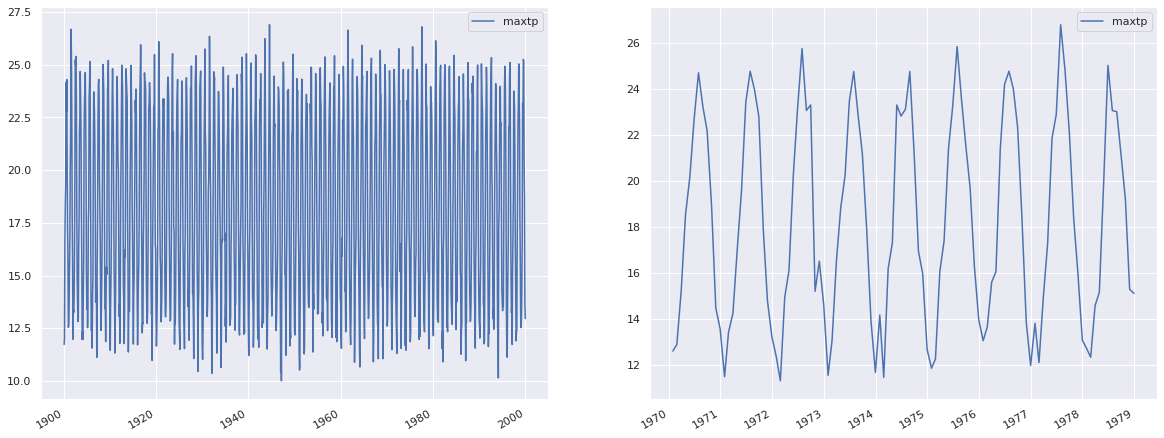

In [19]:
# Plot the results
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=maxtp_100,ax=axes[0])
sns.lineplot(data=maxtp_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

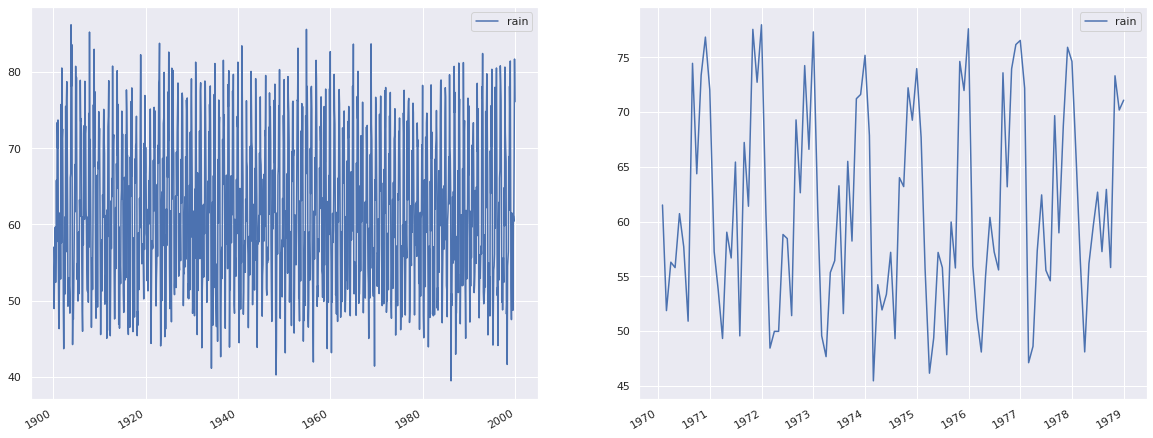

In [20]:
rain_100 = get_mean('rain',sd=4) # Reference [2]
# Plot the results
# Adapted from https://stackoverflow.com/a/31262531
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=rain_100,ax=axes[0])
sns.lineplot(data=rain_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

In [21]:
jan = df.loc[df.loc[:,'month'] == 1]['sun']
jan.dtype
#plt.hist(jan);

dtype('float64')

In [22]:
def get_sun(df_col):
    jan = df.loc[df.loc[:,'month'] == 1][df_col].mean()
    feb = df.loc[df.loc[:,'month'] == 2][df_col].mean()
    mar = df.loc[df.loc[:,'month'] == 3][df_col].mean()
    apr = df.loc[df.loc[:,'month'] == 4][df_col].mean()
    may = df.loc[df.loc[:,'month'] == 5][df_col].mean()
    jun = df.loc[df.loc[:,'month'] == 6][df_col].mean()
    jul = df.loc[df.loc[:,'month'] == 7][df_col].mean()
    aug = df.loc[df.loc[:,'month'] == 8][df_col].mean()
    sep = df.loc[df.loc[:,'month'] == 9][df_col].mean()
    octo = df.loc[df.loc[:,'month'] == 10][df_col].mean()
    nov = df.loc[df.loc[:,'month'] == 11][df_col].mean()
    dec = df.loc[df.loc[:,'month'] == 12][df_col].mean()
    
    sdjan = df.loc[df.loc[:,'month'] == 1][df_col].std()
    sdfeb = df.loc[df.loc[:,'month'] == 2][df_col].std()
    sdmar = df.loc[df.loc[:,'month'] == 3][df_col].std()
    sdapr = df.loc[df.loc[:,'month'] == 4][df_col].std()
    sdmay = df.loc[df.loc[:,'month'] == 5][df_col].std()
    sdjun = df.loc[df.loc[:,'month'] == 6][df_col].std()
    sdjul = df.loc[df.loc[:,'month'] == 7][df_col].std()
    sdaug = df.loc[df.loc[:,'month'] == 8][df_col].std()
    sdsep = df.loc[df.loc[:,'month'] == 9][df_col].std()
    sdocto = df.loc[df.loc[:,'month'] == 10][df_col].std()
    sdnov = df.loc[df.loc[:,'month'] == 11][df_col].std()
    sddec = df.loc[df.loc[:,'month'] == 12][df_col].std()
    
    # Create a 100 year date range with a 1 year frequency starting from January
    rng = pd.date_range('1/1/1900', periods=100, freq='12M')
    jan_100 = pd.DataFrame(np.random.normal(jan,sdjan,100), index=rng, columns=[df_col]) # Create a DF of 100 samples from normal distribution where standard deviation is 1 and mean is the january meant

    ## Create a 100 year date range with a 1 year frequency starting from February
    rng = pd.date_range('2/1/1900', periods=100, freq='12M')
    feb_100 = pd.DataFrame(np.random.normal(feb,sdfeb,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from March
    rng = pd.date_range('3/1/1900', periods=100, freq='12M')
    mar_100 = pd.DataFrame(np.random.normal(mar,sdmar,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from April
    rng = pd.date_range('4/1/1900', periods=100, freq='12M')
    apr_100 = pd.DataFrame(np.random.normal(apr,sdapr,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from May
    rng = pd.date_range('5/1/1900', periods=100, freq='12M')
    may_100 = pd.DataFrame(np.random.normal(may,sdmay,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from June
    rng = pd.date_range('6/1/1900', periods=100, freq='12M')
    jun_100 = pd.DataFrame(np.random.normal(jun,sdjun,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from July
    rng = pd.date_range('7/1/1900', periods=100, freq='12M')
    jul_100 = pd.DataFrame(np.random.normal(jul,sdjul,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from August
    rng = pd.date_range('8/1/1900', periods=100, freq='12M')
    aug_100 = pd.DataFrame(np.random.normal(aug,sdaug,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from September
    rng = pd.date_range('9/1/1900', periods=100, freq='12M')
    sept_100 = pd.DataFrame(np.random.normal(sep,sdsep,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from October
    rng = pd.date_range('10/1/1900', periods=100, freq='12M')
    oct_100 = pd.DataFrame(np.random.normal(octo,sdocto,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from November
    rng = pd.date_range('11/1/1900', periods=100, freq='12M')
    nov_100 = pd.DataFrame(np.random.normal(nov,sdnov,100), index=rng, columns=[df_col])

    ## Create a 100 year date range with a 1 year frequency starting from December
    rng = pd.date_range('12/1/1900', periods=100, freq='12M')
    dec_100 = pd.DataFrame(np.random.normal(dec,sddec,100), index=rng, columns=[df_col])

    ## Merge all the months
    result = pd.merge(jan_100,feb_100,how='outer',on=df_col,left_index=True, right_index=True) # Adapted from https://stackoverflow.com/a/36293107
    result = pd.merge(result,mar_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,apr_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,may_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,jun_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,jul_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,aug_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,sept_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,oct_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,nov_100,how='outer',on=df_col,left_index=True, right_index=True)
    result = pd.merge(result,dec_100,how='outer',on=df_col,left_index=True, right_index=True)
    
    return result


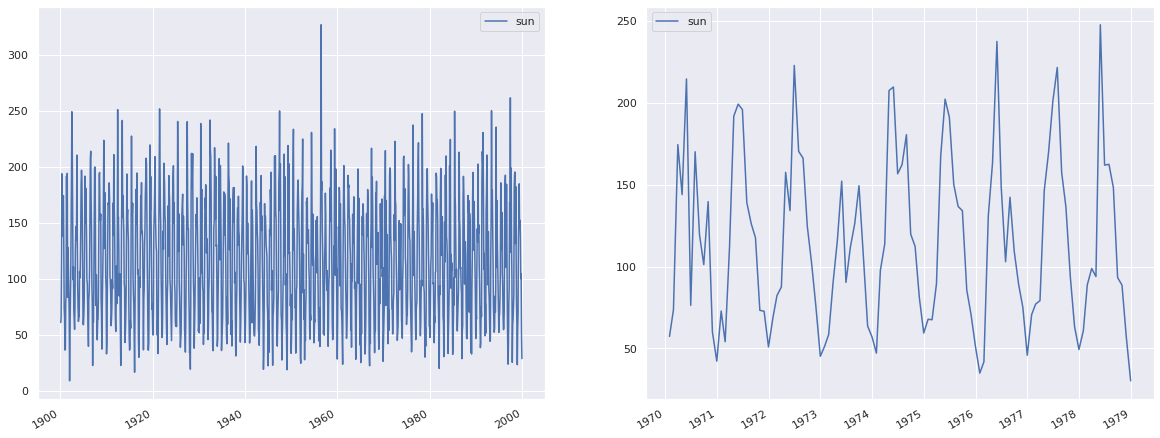

In [23]:
sun_100 = get_sun('sun')
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(data=sun_100,ax=axes[0])
sns.lineplot(data=sun_100['1970-01-01':'1979-01-01'],ax=axes[1])
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate();

In [31]:
all_100 = pd.DataFrame()

In [62]:
all_100['meant'] = meant_100['meant']
all_100['sun'] = sun_100['sun']
all_100['rain'] = rain_100['rain']
all_100['maxtp'] = maxtp_100['maxtp']

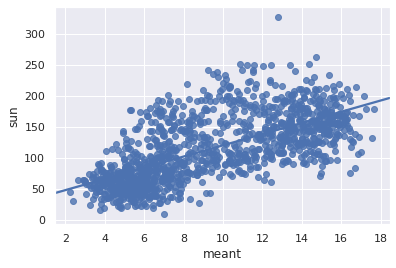

In [65]:
sns.regplot(x="meant",y="sun",data=all_100,fit_reg=True,ci=None);

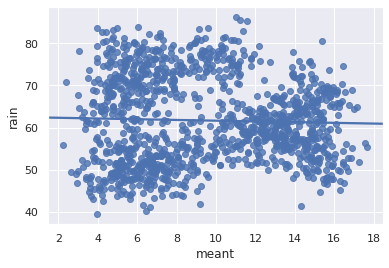

In [66]:
sns.regplot(x="meant",y="rain",data=all_100,fit_reg=True,ci=None);

### Using the sythesised data to model climate change

I will create more extreme weather conditions by increasing the  means and standard deviations

***
## References
[1] Casement Aerodrome Monthly Data 1944 - Present :  https://cli.fusio.net/cli/climate_data/webdata/mly3723.zip

[2] Annual Rainfall - https://www.sciencedirect.com/topics/engineering/annual-rainfall

# End
***